 eigenvalues in a list [0.00911001 0.02733007 0.04555402 0.06378026 0.08217909 0.10051933
 0.12075837 0.13960835 0.16605379 0.18550794 0.22187975 0.24127358
 0.28922944 0.30760568 0.36815099 0.38450809 0.45858424 0.47193193
 0.56862795 0.58007272] 

[5998.240818, 9997.06803, 13995.895241999999, 17994.722454000002, 21993.549666] energy in cm^1 

 column 1 is the exact eigenvalues and column 2 are the calculated values 
 [[0.02733    0.02733007]
 [0.04555    0.04555402]
 [0.06377    0.06378026]
 [0.08199    0.08217909]
 [0.10021    0.10051933]]


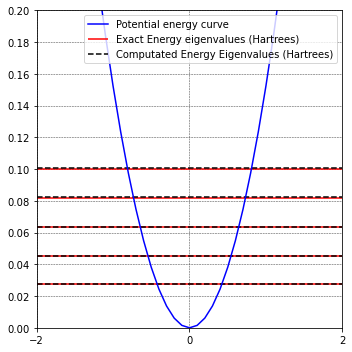

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.integrate as integrate
import math
from EigDiag import EigDiag


class Matrix():  # this will make my matrix elements. Every matrix element will be an object of this class
    masse = 0.00054858
    u = 1.00784 / (2 * masse)
    w = 0.01822

    def __init__(self, m, n, L):
        self.m = m
        self.n = n
        self.L = L

    def wave_m(self, x):  # wavefunction_m
        inside = (self.m * math.pi * (x + self.L / 2) / self.L)
        return math.sqrt(2 / self.L) * math.sin(inside)

    def wave_n(self, x):  # wavefunction_n
        inside = (self.n * math.pi * (x + self.L / 2) / self.L)
        return math.sqrt(2 / self.L) * math.sin(inside)

    def tsol(self):  # I already know what <n|T|n> equals
        return ((self.n ** 2) * (math.pow(math.pi, 2)) / (2 * Matrix.u * math.pow(self.L, 2)))

    def vsol(self, x):  # V(x)
        return (0.5 * Matrix.u * math.pow(Matrix.w, 2) * x ** 2)

    def mwaven_int(self):  # <m|V(x)|n>
        fun_i = lambda x: self.wave_m(x) * self.vsol(x) * self.wave_n(x)
        return integrate.quad(fun_i, -self.L / 2, self.L / 2)

    # i am throwing these in for the plotting part of the homework, they have nothing to do with the matrix elements of this class
    def energylev(self, v):  # function for finding the exact energy levels
        return 1 * Matrix.w * (v + 0.5)


def main():
    bigm = np.zeros((20, 20))  # initialize the matrix
    for m in range(1, 21):  # iterate m through a range of values from 1 to 20
        for n in range(1, 21):  # iterate n through a range of values from 1 to 20
            matrix_elem = Matrix(m, n, 4)  # create the Matrix element object
            if m == n:  # if m == n then H= <n|T|n>
                bigm[m - 1, n - 1] = matrix_elem.tsol() + matrix_elem.mwaven_int()[
                    0]  # python uses 0-based indexing so we need to subtract m,n by 1
            else:  # if m =/= then H= <m|V|n>, because <m|T|n> = 0 when m =/= n
                bigm[m - 1, n - 1] = matrix_elem.mwaven_int()[0]
    bigm_diag, sortedeig = EigDiag(bigm)
    # this function will find the eigenvalues, sort them, and put in a diagonal matrix
#     print(f" eigenvalues in diagonal matrix \n {bigm_diag} \n ")
    print(f" eigenvalues in a list {sortedeig} \n")  # print using an fstring

    # getting the exact energy levels
    y = []  # y for appending the exact energy eigenvalues for HO in hartrees
    y_cm = []  # y for appending the exact energy eigenvalues for HO in wavenumbers
    for v in range(1, 6):
        y.append(matrix_elem.energylev(v))  # append the exact eigenvalues for HO
        blah = y[v - 1] * 219474.6  # h to cm^-1
        y_cm.append(blah)  # append the exact eigenvalues in cm^-1
    print(f"{y_cm} energy in cm^1 \n")
    fig = plt.figure(figsize=(5, 5))  # create the figure box
    ax = fig.add_subplot(1, 1, 1, aspect=1)  # add a single subplot
    ax.hlines(y, -2, 2, 'r', label='Exact Energy eigenvalues (Hartrees)')  # plot the energy eigenvalues

    # plotting the potential energy
    y1 = []
    x1 = []
    for x in np.arange(-2, 2.1, 0.1):
        y1.append(matrix_elem.vsol(x))  # storing the y values for the potiential
        x1.append(x)  # storing multiple x values for plotting purposes
    ax.plot(x1, y1, 'b', label='Potential energy curve')  # plot the potential
    ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)  # show the grid
    plt.xlim(-2, 2)  # set the x limit for the plot
    plt.ylim(0, 0.2)  # set the y limit
    plt.locator_params(axis='y', nbins=10)  # set the number of bins for the y
    plt.locator_params(axis='x', nbins=1)  # set number of bins for x
    ax.set_aspect('auto')  # the plot will fill up the entire figure -this does the trick!
    fig.tight_layout()

    # make a list containg the exact eigenvalues and the approximate ones
    comp_list = np.zeros((5, 2))
    comp_list[:, 0] = y
    comp_list[:, 1] = sortedeig[1:6]
    print(f" column 1 is the exact eigenvalues and column 2 are the calculated values \n {comp_list}")

    ax.hlines(sortedeig[1:6], -2, 2, 'k', 'dashed',
              label='Computated Energy Eigenvalues (Hartrees)')  # plot computed values
    ax.legend()  # show the legend
    plt.show()  # display the plot


if __name__ == "__main__":
    main()
